In [4]:
import pandas as pd

In [5]:
df = pd.read_excel('./output.xlsx')

In [64]:
import matplotlib.pyplot as plt
plt.style.available

['bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn',
 'Solarize_Light2',
 'tableau-colorblind10',
 '_classic_test']

## Freelancers Sort by Country

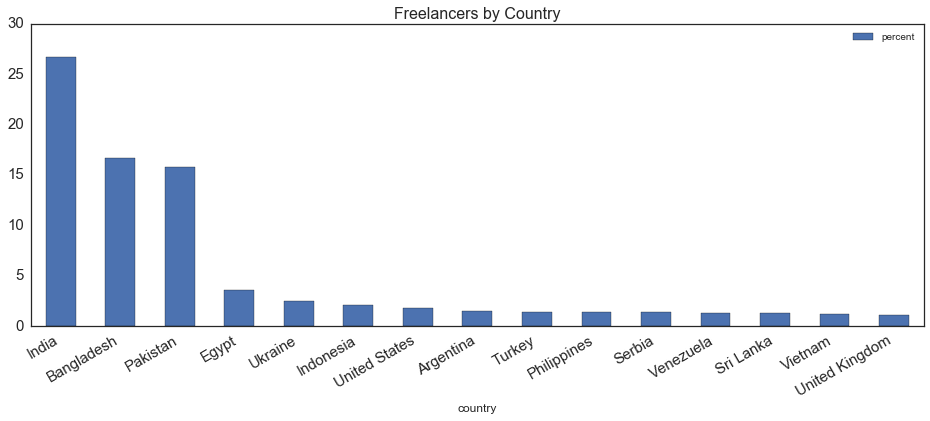

In [412]:
%matplotlib inline
plt.style.use('seaborn-white')

df1 = df[['Name','country']]
df1 = df1.groupby('country').count()
df1 = df1.sort_values('Name', ascending=False)
df1['percent'] = df1.Name/100

fg2 = df1[['percent']][:15].plot(kind='bar', title="Freelancers by Country", figsize=(16,6), fontsize=15).get_figure()
fg2.autofmt_xdate(rotation=30)
fg2.savefig("freelancers by country (bar chart)")

In [186]:
df2 = df1[df1.percent>=1]

remaining = 100-df2.percent.sum()
df2.loc['Other'] = [int(remaining*100), remaining]

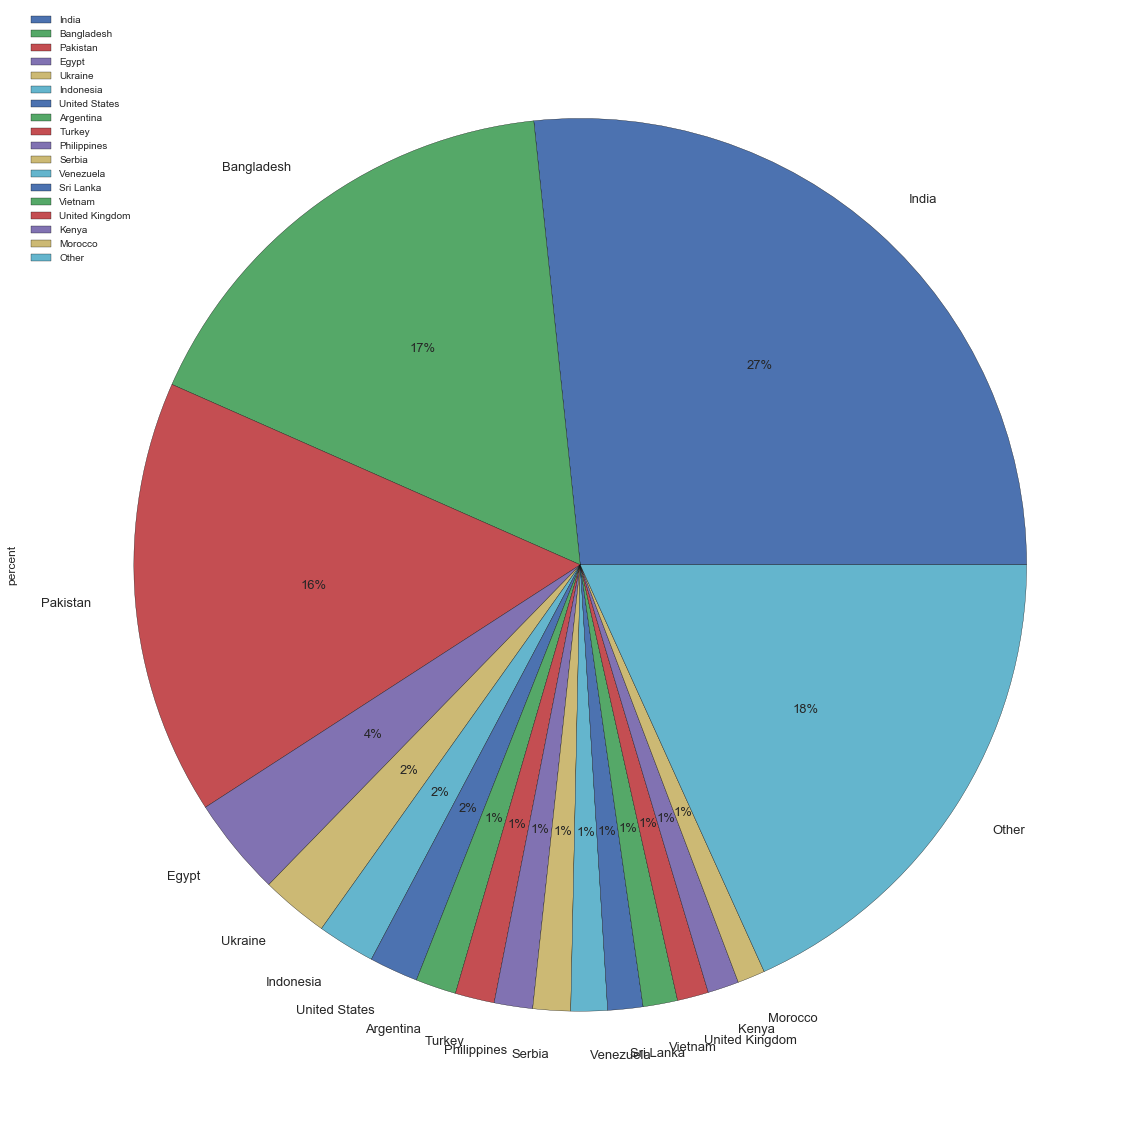

In [218]:
fig = df2[['percent']].plot.pie(y='percent',figsize=(20,20),fontsize=13, autopct='%1.0f%%').get_figure()
fig.savefig('freelancer by country')

## Freelancer in India Sort by City

In [352]:
india = df[df.country =='India'][['city', 'Username']]
india.city = india.city.str.capitalize()
india = india.groupby('city').count().sort_values('Username', ascending=False)

In [355]:
total = cities.sum()
total

Username    2665
dtype: int64

In [356]:
india['percent'] = (india.Username/int(total))*100

In [372]:
india.head(10)

,Username,percent
city,,
Jaipur,171,6.416510
Kolkata,133,4.990619
Indore,115,4.315197
Surat,102,3.827392
Ahmedabad,88,3.302064
New delhi,63,2.363977
Rajkot,54,2.026266
Mumbai,50,1.876173
Lucknow,46,1.726079


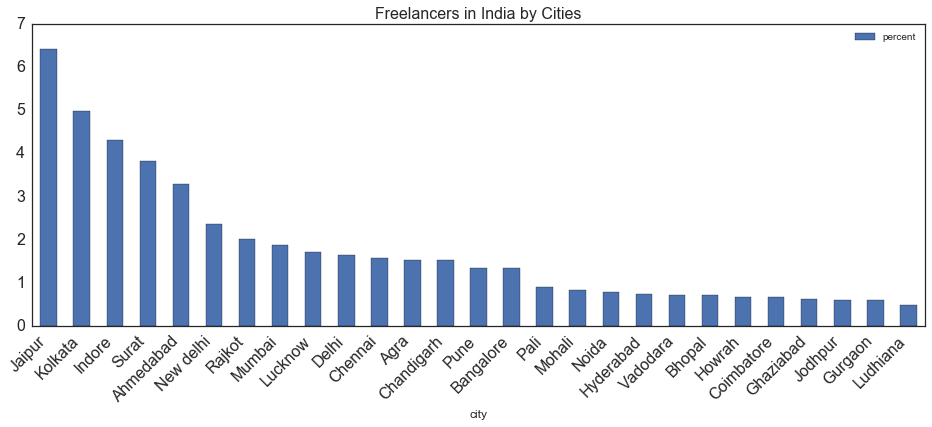

In [389]:
fg = india[['percent']][:27].plot(kind='bar', title="Freelancers in India by Cities", figsize=(16,6), fontsize=16, width=0.5).get_figure()
fg.autofmt_xdate(rotation=45)
fg.savefig('freelancer in india')

## More Analysis
## Freelancers from top 5 countries by rank

In [6]:
df.city = df.city.str.capitalize()
df.country = df.country.str.capitalize()

In [7]:
df.head()

,Url,Name,Username,hourlyrate,earning,country,city,review_a,eh_stars,rating,tagline,full_desc
0,https://www.freelancer.com/u/delowar84,Delowar84,Delowar84,8,244141.0,Bangladesh,Dhaka,3525.0,4.978312,5.0,PHOTOSHOP & GRAPHIC DESIGN EXPERT,ALWAYS DO MORE THAN IS REQUIRED OF YOU.\nWe ar...
1,https://www.freelancer.com/u/rabiulkhan866,rabiulkhan866,rabiulkhan866,20,76206.0,Bangladesh,Kashiani,1489.0,4.991264,5.0,Logo | Vector | Graphic | Illustrator | Photo...,"Hi,\n\nThank you for considering me for your p..."
2,https://www.freelancer.com/u/matgapa,MaTGaPa,MaTGaPa,25,23707.0,Argentina,Mar del plata,478.0,4.995360,5.0,"SysAdmin, Network Administrator Linux","I started with BeOS in 2002, because of a fri..."
3,https://www.freelancer.com/u/metadesignindia,MetaDesignIndia,MetaDesignIndia,30,413112.0,India,Kolkata,1877.0,4.980983,5.0,Professional Logo & Graphic Designer | Illustr...,I'm a graphic designer with more than 6 years ...
4,https://www.freelancer.com/u/amin585147,amin585147,amin585147,20,117419.0,Bangladesh,Khulna,1696.0,4.973634,5.0,PLEASE PM ME OR AWARD ME GET THE BEST RESULT!,I am a qualified Professional Graphic Designer...


In [52]:
df_1 = df.groupby(['country','rating']).count()[['Name']].sort_values('Name', ascending=False).reset_index()
df_1

,country,rating,Name
0,India,5.0,1224
1,India,4.9,924
2,Pakistan,5.0,790
3,Bangladesh,5.0,776
4,Bangladesh,4.9,572
...,...,...,...
405,Panama,4.9,1
406,Peru,4.1,1
407,Peru,4.6,1
408,France,4.7,1


In [51]:
# only interested in top 5 countries
top_5_countries = df_1.country.unique()[:5]
top_country_freelancer = df_1[df_1.country.isin(top_5_countries)].sort_values(['country','rating'], ascending=False)
top_country_freelancer

,country,rating,Name
10,Ukraine,5.0,163
24,Ukraine,4.9,68
141,Ukraine,4.8,5
173,Ukraine,4.7,3
180,Ukraine,4.6,3
298,Ukraine,4.5,1
297,Ukraine,4.0,1
296,Ukraine,3.7,1
2,Pakistan,5.0,790
5,Pakistan,4.9,516


<BarContainer object of 5 artists>

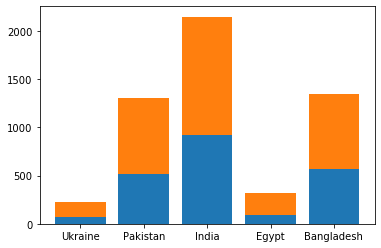

In [94]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
# fig = plt.figure()
# ax = fig.add_subplot(111)

# Create a figure and an Axes object
# fig, ax = plt.subplots()


# ax = rate_4_9.plot(kind='bar',x='country',y='Name')

# for rating in np.linspace(4,5,11):
#     print('rating:', rating)
dd = top_country_freelancer
d4 = dd[dd.rating==4.9]
d5 = dd[dd.rating==5.0]

plt.bar(d4.country, d4.Name, label='5 stars')
plt.bar(d5.country, d5.Name, bottom=d4.Name, label='4 stars')

# plt.bar(d4.country, d4.Name)

# ax = d4.plot(kind='bar',x='country',y='Name', color='r', alpha=0.5)
# d5.plot(kind='bar',x='country',y='Name',ax=ax)

# ax.bar(data.country, data.Name)    
# fig.show()

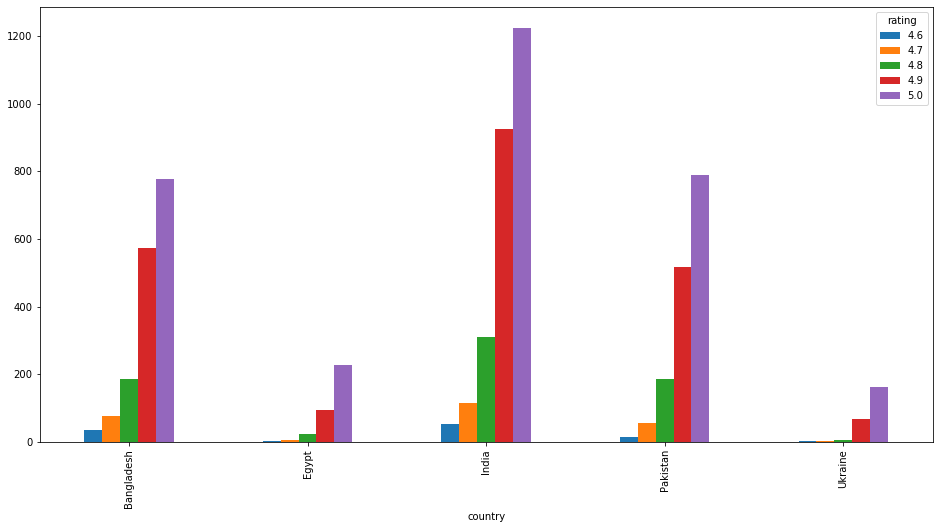

In [137]:
top_country_freelancer[top_country_freelancer.rating >=4.6].pivot_table(index='country', columns='rating', values='Name', fill_value=0.0).plot.bar(stacked=False, figsize=(16,8))

In [ ]:
df_1[df_1.rating <= 4.0]

,country,rating,Name
33,United kingdom,3.6,1
44,Ukraine,4.0,1
45,Ukraine,3.7,1
148,Pakistan,3.6,1
149,Pakistan,3.9,1
150,Pakistan,4.0,1
189,Mexico,3.8,1
250,Indonesia,0.0,1
258,India,0.0,1
259,India,3.6,1
